# ЭТАП 1: Exploratory Data Analysis

**Цель**: Исследовать датасет, понять распределения признаков и найти закономерности.

---

# Импорт библиотек

In [2]:
# Основные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("Библиотеки импортированы успешно!")


Библиотеки импортированы успешно!


# Загрузка и проверка Датасета

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Загрузка датасета
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset.csv', index_col=0)

print(f"Загружено записей: {len(df)}")
print(f"Количество колонок: {len(df.columns)}")
print(f"Размер в памяти: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Вывод первых 10 записей
df.head(10)


Загружено записей: 114000
Количество колонок: 20
Размер в памяти: 49.66 MB


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,1,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


# Общая информация о данных

In [ ]:
# Информация о типах данных
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           114000 

In [ ]:
# Описательная статистика
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


---
# ЗАДАЧА 1: Анализ целевой переменной `popularity`

**Цель**: Понять, как распределена популярность треков, выявить выбросы и особенности.

**Гипотезы**:
- Ожидаем, что большинство треков имеют низкую популярность
- Возможно наличие выбросов (очень популярные треки)
- Распределение может быть скошенным

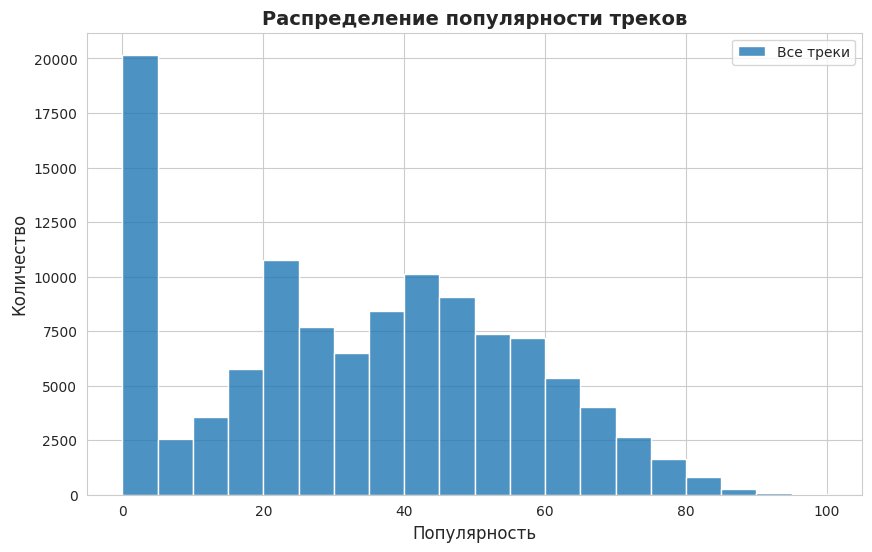

In [153]:
# Визуализация распределения popularity

sns.set_style("whitegrid")

# Создание графика распределения
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='popularity', bins=20, label='Все треки', alpha=0.8)



# Настройка оформления
plt.xlabel('Популярность', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.title('Распределение популярности треков', fontsize=14, fontweight='bold')
plt.legend()

plt.show()

In [ ]:
# Описательная статистика для popularity
print("="*60)
print("Статистика целевой переменной 'popularity':")
print("="*60)
print(df['popularity'].describe())
print(f"\nМедиана: {df['popularity'].median()}")
print(f"Мода: {df['popularity'].mode()[0]}")
print(f"Асимметрия (skewness): {df['popularity'].skew():.2f}")
print(f"Эксцесс (kurtosis): {df['popularity'].kurtosis():.2f}")

Статистика целевой переменной 'popularity':
count    114000.000000
mean         33.238535
std          22.305078
min           0.000000
25%          17.000000
50%          35.000000
75%          50.000000
max         100.000000
Name: popularity, dtype: float64

Медиана: 35.0
Мода: 0
Асимметрия (skewness): 0.05
Эксцесс (kurtosis): -0.93


In [ ]:
# Выявление выбросов по методу IQR
Q1 = df['popularity'].quantile(0.25)
Q3 = df['popularity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['popularity'] < lower_bound) | (df['popularity'] > upper_bound)]
print(f"\nГраницы для выбросов:")
print(f"   Нижняя граница: {lower_bound:.2f}")
print(f"   Верхняя граница: {upper_bound:.2f}")
print(f"\nКоличество выбросов: {len(outliers):,} ({len(outliers)/len(df)*100:.2f}%)")


Границы для выбросов:
   Нижняя граница: -32.50
   Верхняя граница: 99.50

Количество выбросов: 2 (0.00%)


### Вывод по Задаче 1:

**Что обнаружили**:
1. Распределение популярности более "плоское" чем нормальное (эксцесс = -0.93)
3. Распределение популярности почти симметричное (асимметрия = 0.05)
4. Медиана: 35.0, среднее значение: 33.2 - близкие значения подтверждают симметричность
5. Всего 2 выброса (0.00%) - треки с популярностью 100
6. Минимальная популярность: 0, максимальная: 100

**Что это значит**:
- Симметричное распределение упрощает ML
- Минимум выбросов - не нужно сложной обработки аномалий
- Плоское распределение возможно затруднит поиск закономерностей
- Мода 0, говорит нам о том, что в датасете много непопулярных треков
- Стандартное отклонение 22.3, когда среднее 33. Треки в коллекции по-разному популярны — есть полные нули, есть среднячки, есть хиты
- Проблeмой может стать мода равная 0

**Следующие шаги**:
- Исследование числовых признаков

# ЗАДАЧА 2: Исследование числовых признаков

**Цель**: Понять распределение всех числовых признаков и выявить аномалии.
   - Гистограммы распределений для каждого признака
   - Box plots для выявления выбросов
   - Описательная статистика (mean, median, std, quartiles)

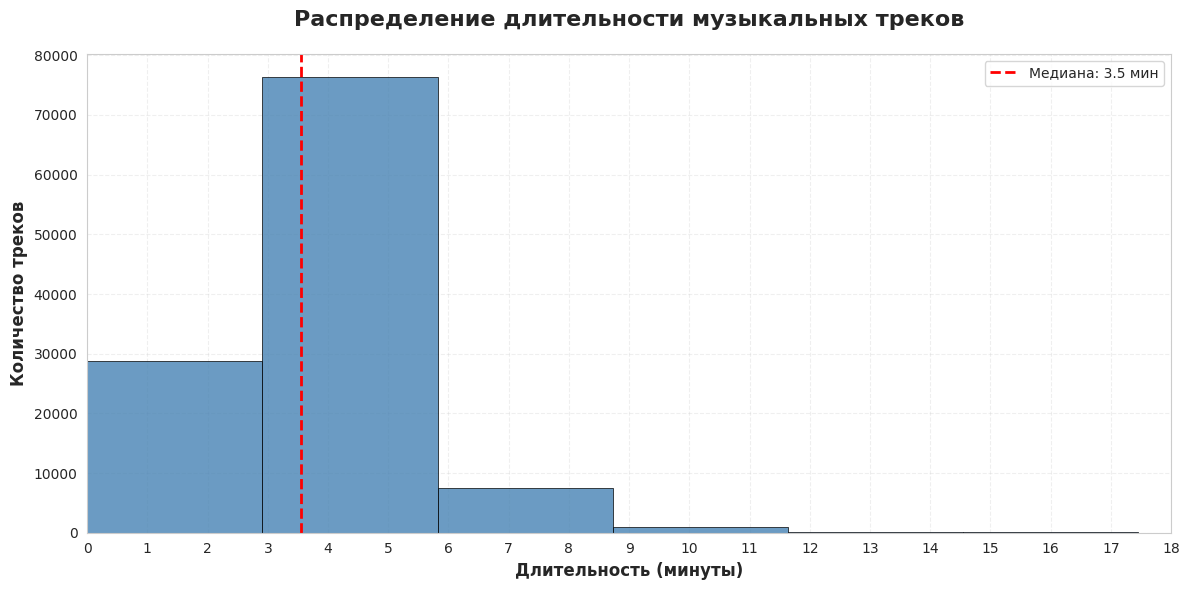

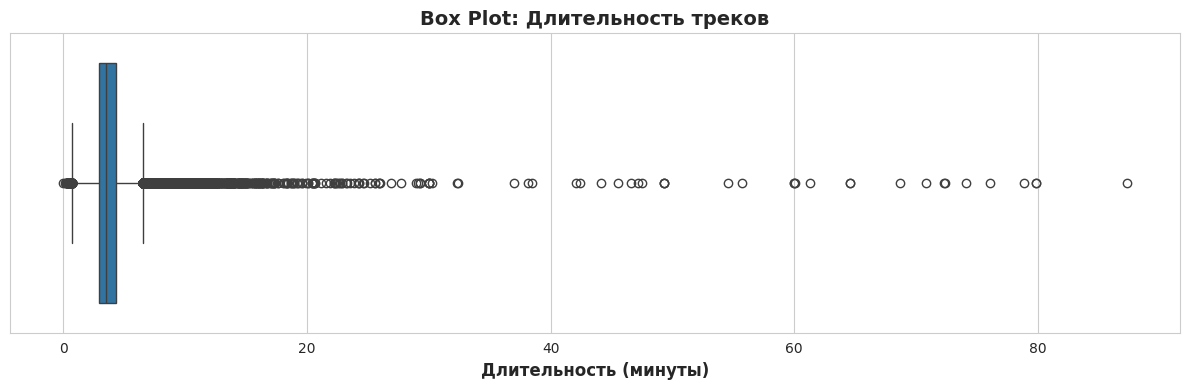

In [150]:
# Визуализация распределения duration_ms
sns.set_style("whitegrid")

# Гистограмма
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x=df['duration_ms']/60000, bins=30,
             alpha=0.8, color='steelblue', edgecolor='black', linewidth=0.5)
plt.xticks(range(0, 19, 1))
plt.xlim(0, 18)
plt.xlabel('Длительность (минуты)', fontsize=12, fontweight='bold')
plt.ylabel('Количество треков', fontsize=12, fontweight='bold')
plt.title('Распределение длительности музыкальных треков',
          fontsize=16, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, linestyle='--')

median_duration = df['duration_ms'].median() / 60000
plt.axvline(median_duration, color='red', linestyle='--', linewidth=2,
           label=f'Медиана: {median_duration:.1f} мин')
plt.legend()
plt.tight_layout()
plt.show()


print("\n\n")

# Boxplot
plt.figure(figsize=(12, 4))
sns.boxplot(data=df, x=df['duration_ms']/60000)
plt.xlabel('Длительность (минуты)', fontsize=12, fontweight='bold')
plt.title('Box Plot: Длительность треков', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

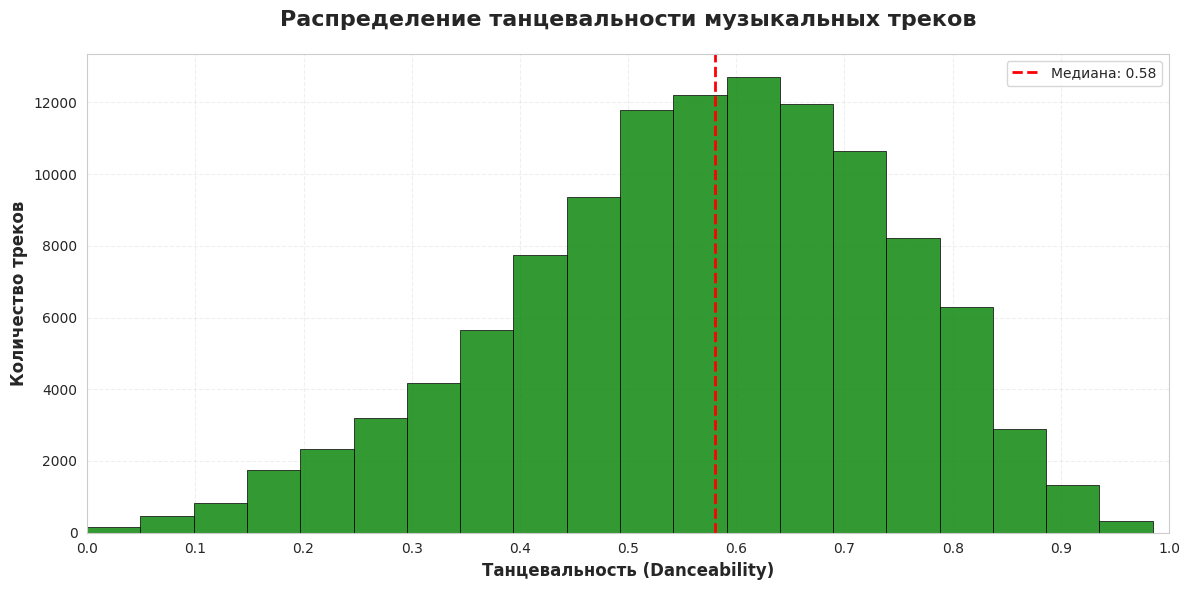

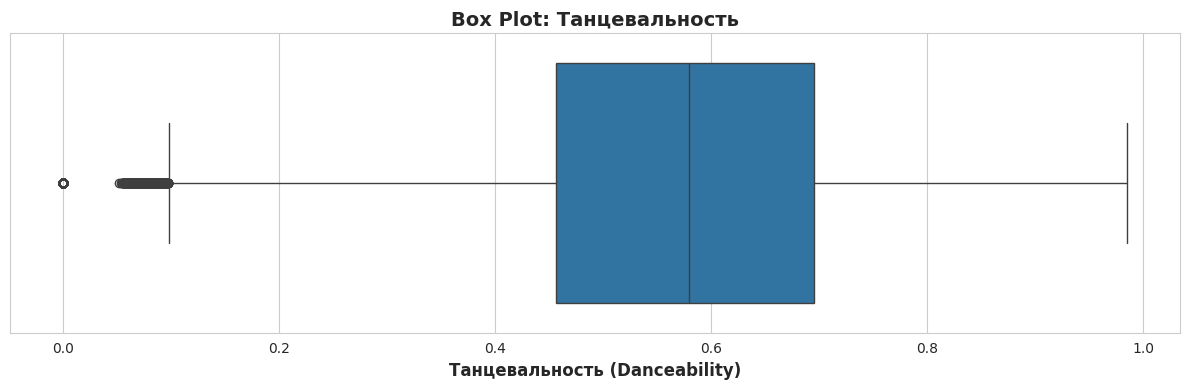

In [154]:
# Визуализация распределения danceability
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="danceability", bins=20,
             alpha=0.8, color='green', edgecolor='black', linewidth=0.5)

plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.xlim(0, 1)
plt.xlabel('Танцевальность (Danceability)', fontsize=12, fontweight='bold')
plt.ylabel('Количество треков', fontsize=12, fontweight='bold')
plt.title('Распределение танцевальности музыкальных треков',
          fontsize=16, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, linestyle='--')

median_dance = df['danceability'].median()
plt.axvline(median_dance, color='red', linestyle='--', linewidth=2,
           label=f'Медиана: {median_dance:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

print("\n\n")

# Boxplot
plt.figure(figsize=(12, 4))
sns.boxplot(data=df, x="danceability")
plt.xlabel('Танцевальность (Danceability)', fontsize=12, fontweight='bold')
plt.title('Box Plot: Танцевальность', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

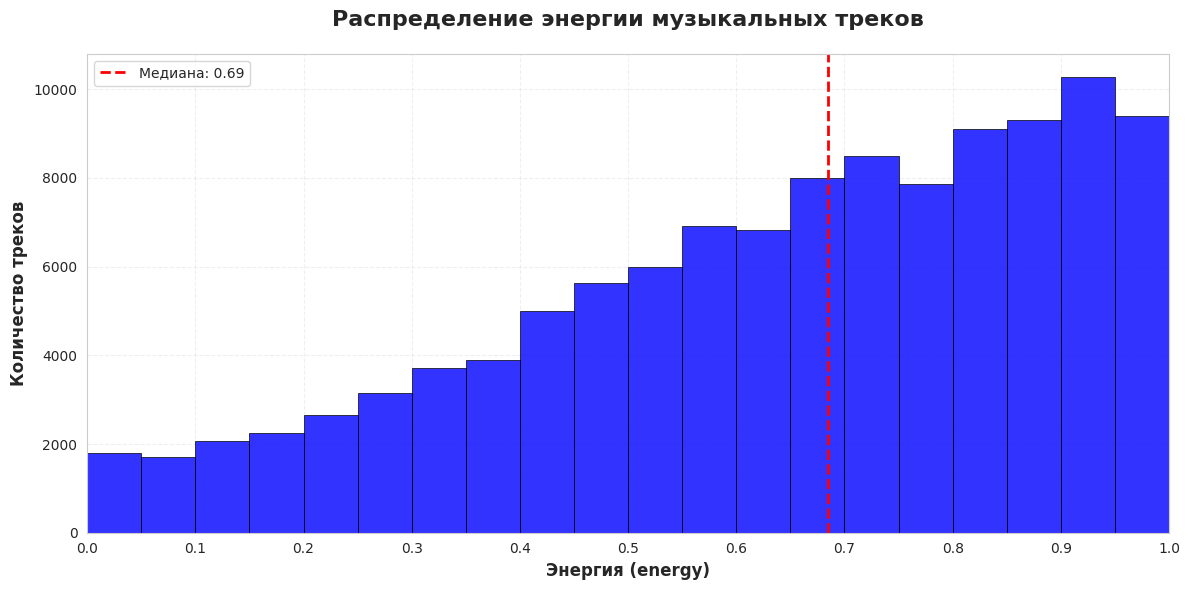

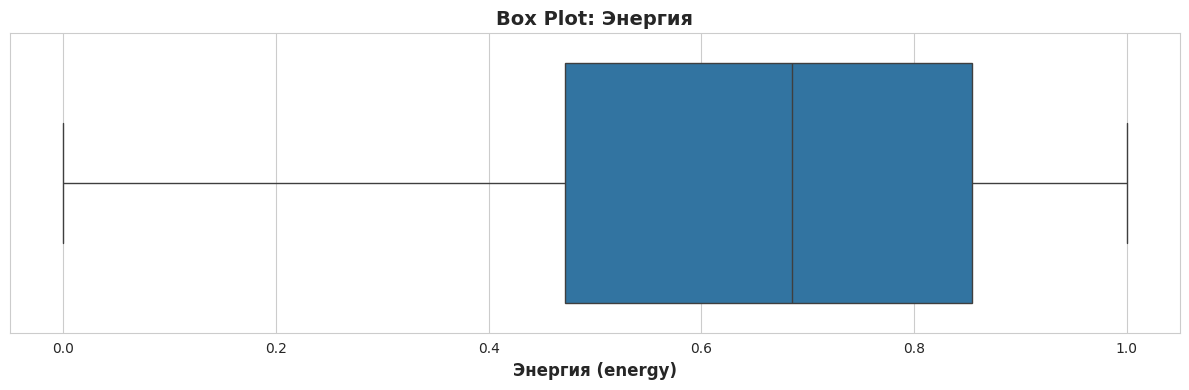

In [155]:
# Визуализация распределения energy
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="energy", bins=20,
             alpha=0.8, color='blue', edgecolor='black', linewidth=0.5)

plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.xlim(0, 1)
plt.xlabel('Энергия (energy)', fontsize=12, fontweight='bold')
plt.ylabel('Количество треков', fontsize=12, fontweight='bold')
plt.title('Распределение энергии музыкальных треков',
          fontsize=16, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, linestyle='--')

median_energy = df['energy'].median()
plt.axvline(median_energy, color='red', linestyle='--', linewidth=2,
           label=f'Медиана: {median_energy:.2f}')
plt.legend()
plt.tight_layout()
plt.show()
print("\n\n")

# Boxplot
plt.figure(figsize=(12, 4))
sns.boxplot(data=df, x="energy")
plt.xlabel('Энергия (energy)', fontsize=12, fontweight='bold')
plt.title('Box Plot: Энергия', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


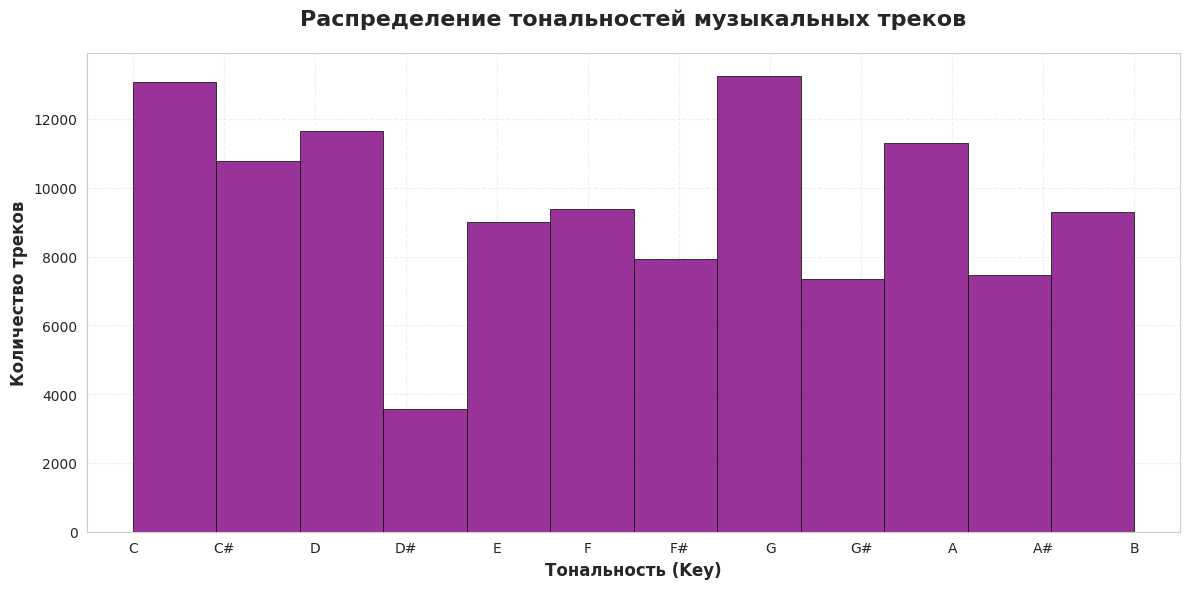

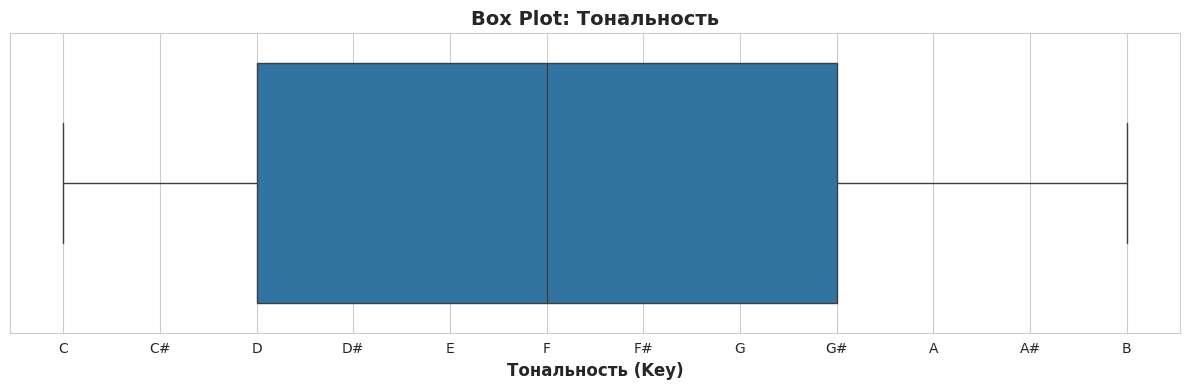

In [156]:
# Визуализация распределения key
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="key", bins=12,
             alpha=0.8, color='purple', edgecolor='black', linewidth=0.5)

# Подписи тональностей
tonalities = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
plt.xticks(range(0, 12), tonalities)
plt.xlim(-0.5, 11.5)
plt.xlabel('Тональность (Key)', fontsize=12, fontweight='bold')
plt.ylabel('Количество треков', fontsize=12, fontweight='bold')
plt.title('Распределение тональностей музыкальных треков',
          fontsize=16, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

print("\n\n")

# Boxplot
plt.figure(figsize=(12, 4))
sns.boxplot(data=df, x="key")
plt.xticks(range(0, 12), tonalities)
plt.xlabel('Тональность (Key)', fontsize=12, fontweight='bold')
plt.title('Box Plot: Тональность', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

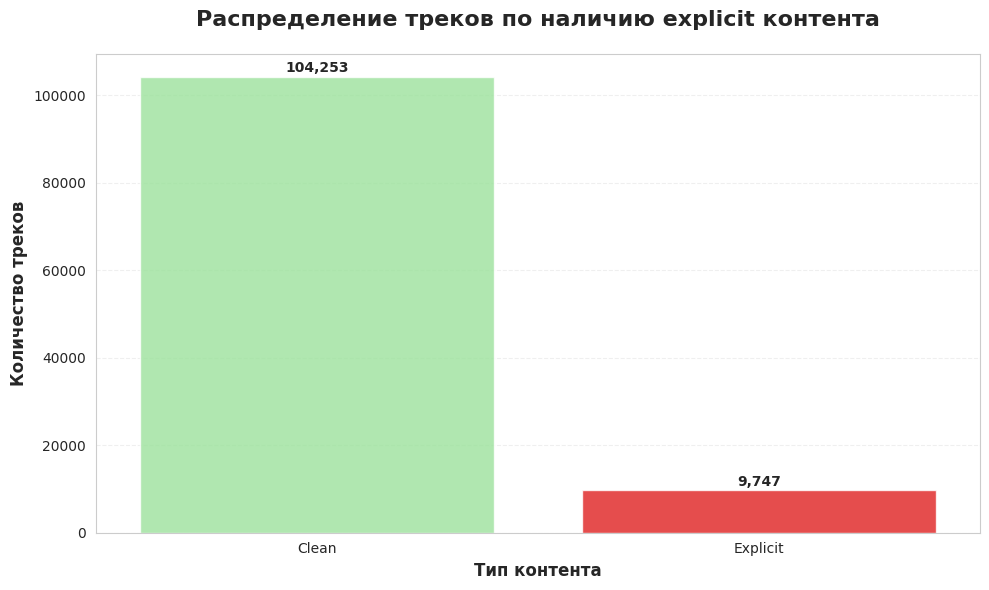

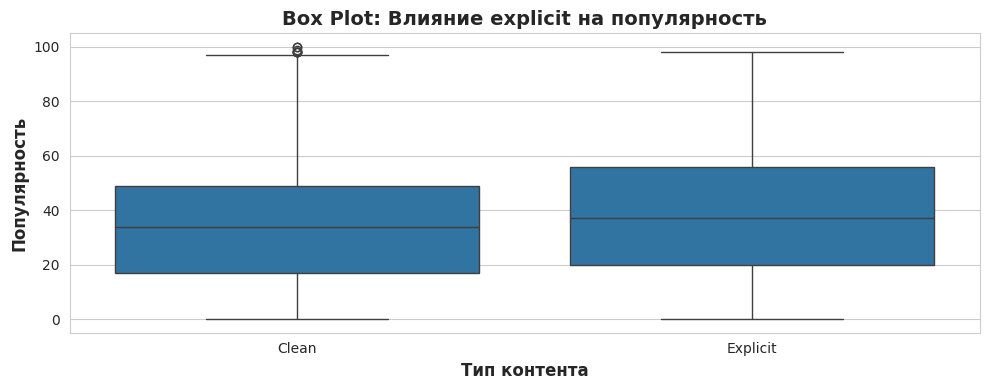

Статистика:
Всего треков: 114,000
Clean треков: 104,253 (91.5%)
Explicit треков: 9,747 (8.6%)


In [157]:
# Визулиазция распределения треков по наличию explicit контента
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='explicit', palette=['lightgreen', 'red'], alpha=0.8)

plt.xticks([0, 1], ['Clean', 'Explicit'])
plt.xlabel('Тип контента', fontsize=12, fontweight='bold')
plt.ylabel('Количество треков', fontsize=12, fontweight='bold')
plt.title('Распределение треков по наличию explicit контента',
          fontsize=16, fontweight='bold', pad=20)

counts = df['explicit'].value_counts().sort_index()
plt.text(0, counts[0] + 1000, f'{counts[0]:,}', ha='center', fontweight='bold')
plt.text(1, counts[1] + 1000, f'{counts[1]:,}', ha='center', fontweight='bold')

plt.grid(True, alpha=0.3, linestyle='--', axis='y')
plt.tight_layout()
plt.show()

print("\n\n")

# Boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x='explicit', y='popularity')
plt.xticks([0, 1], ['Clean', 'Explicit'])
plt.xlabel('Тип контента', fontsize=12, fontweight='bold')
plt.ylabel('Популярность', fontsize=12, fontweight='bold')
plt.title('Box Plot: Влияние explicit на популярность', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Статистика
print("Статистика:")
print(f"Всего треков: {len(df):,}")
print(f"Clean треков: {len(df[df['explicit'] == False]):,} ({(len(df[df['explicit'] == False])/len(df))*100:.1f}%)")
print(f"Explicit треков: {len(df[df['explicit'] == True]):,} ({(len(df[df['explicit'] == True])/len(df))*100:.1f}%)")

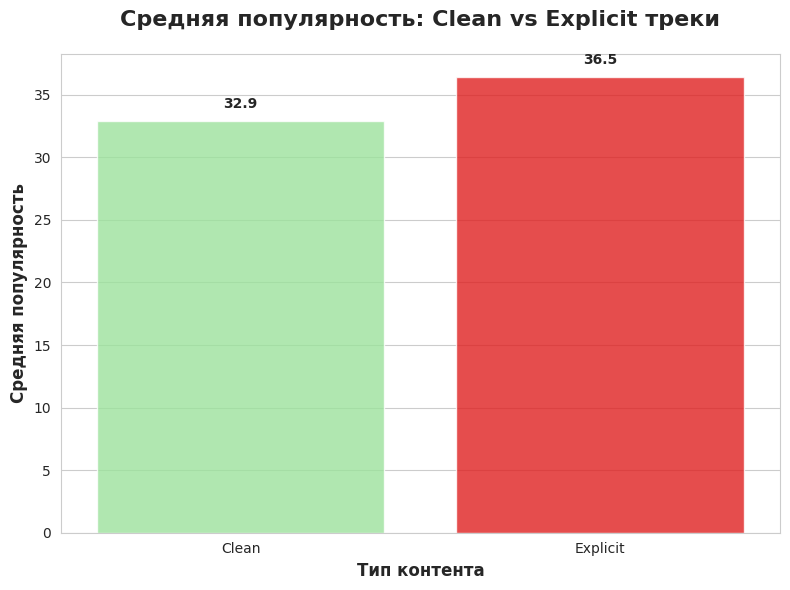

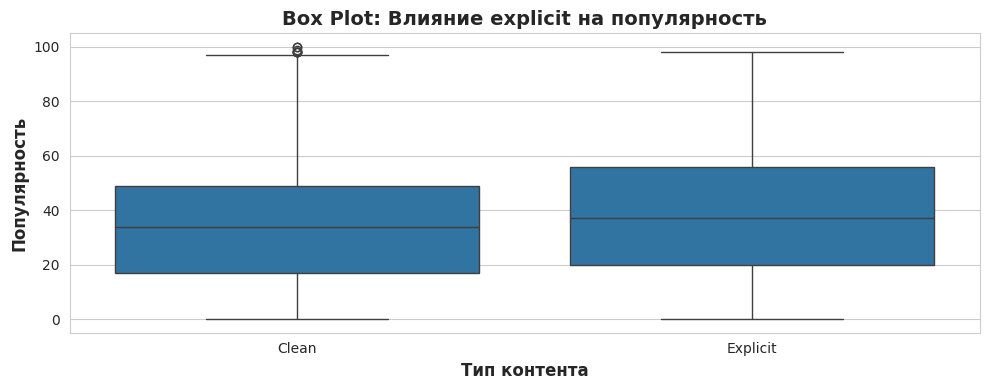

In [158]:
# Визулиазция распределения популярности треков по наличию explicit контента
plt.figure(figsize=(8, 6))
explicit_stats = df.groupby('explicit')['popularity'].mean()

sns.barplot(x=explicit_stats.index, y=explicit_stats.values,
            palette=['lightgreen', 'red'], alpha=0.8)

plt.xticks([0, 1], ['Clean', 'Explicit'])
plt.xlabel('Тип контента', fontsize=12, fontweight='bold')
plt.ylabel('Средняя популярность', fontsize=12, fontweight='bold')
plt.title('Средняя популярность: Clean vs Explicit треки',
          fontsize=16, fontweight='bold', pad=20)

for i, value in enumerate(explicit_stats.values):
    plt.text(i, value + 1, f'{value:.1f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n\n")

# Boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x='explicit', y='popularity')
plt.xticks([0, 1], ['Clean', 'Explicit'])
plt.xlabel('Тип контента', fontsize=12, fontweight='bold')
plt.ylabel('Популярность', fontsize=12, fontweight='bold')
plt.title('Box Plot: Влияние explicit на популярность', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

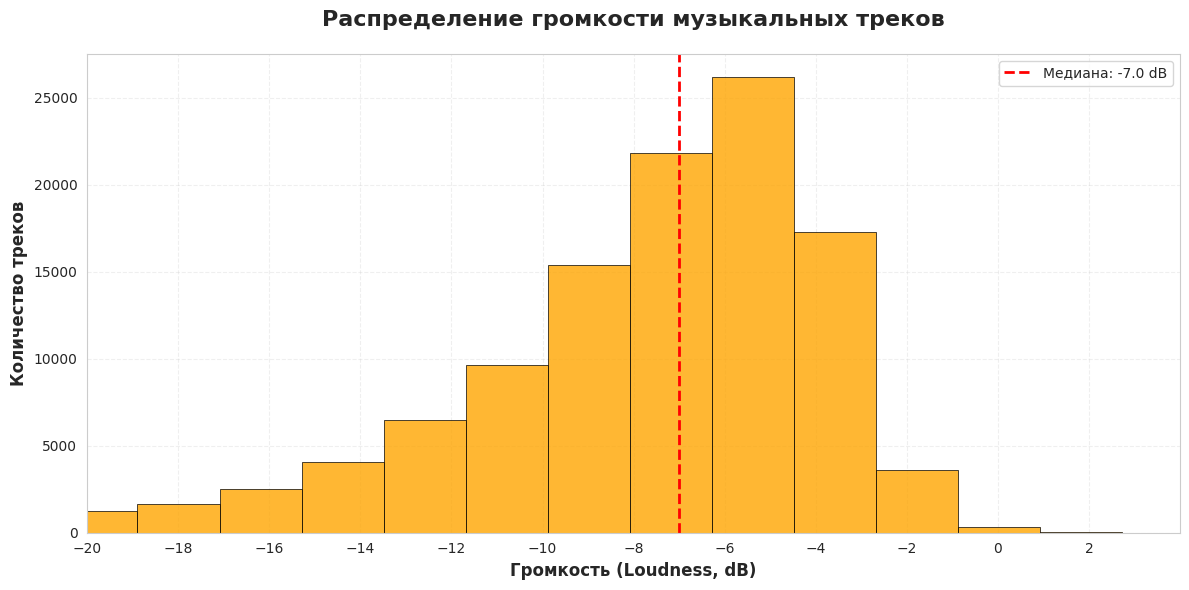

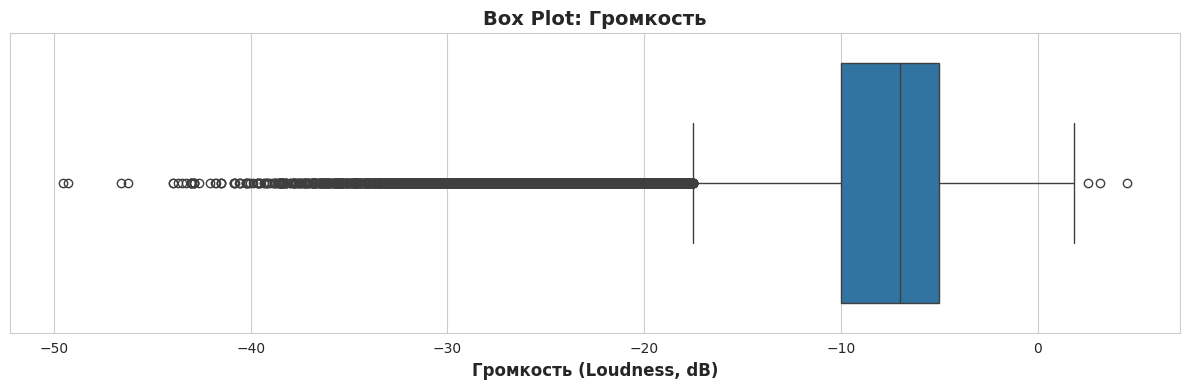

In [159]:
# Визулиазция распределения громкости музыкальных треков
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

sns.histplot(data=df, x="loudness", bins=30,
             alpha=0.8, color='orange', edgecolor='black', linewidth=0.5)

plt.xticks(range(-20, 4, 2))
plt.xlim(-20, 4)
plt.xlabel('Громкость (Loudness, dB)', fontsize=12, fontweight='bold')
plt.ylabel('Количество треков', fontsize=12, fontweight='bold')
plt.title('Распределение громкости музыкальных треков',
          fontsize=16, fontweight='bold', pad=20)

median_loudness = df['loudness'].median()
plt.axvline(median_loudness, color='red', linestyle='--', linewidth=2,
           label=f'Медиана: {median_loudness:.1f} dB')

plt.grid(True, alpha=0.3, linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

print("\n\n")

# Boxplot
plt.figure(figsize=(12, 4))
sns.boxplot(data=df, x="loudness")
plt.xlabel('Громкость (Loudness, dB)', fontsize=12, fontweight='bold')
plt.title('Box Plot: Громкость', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

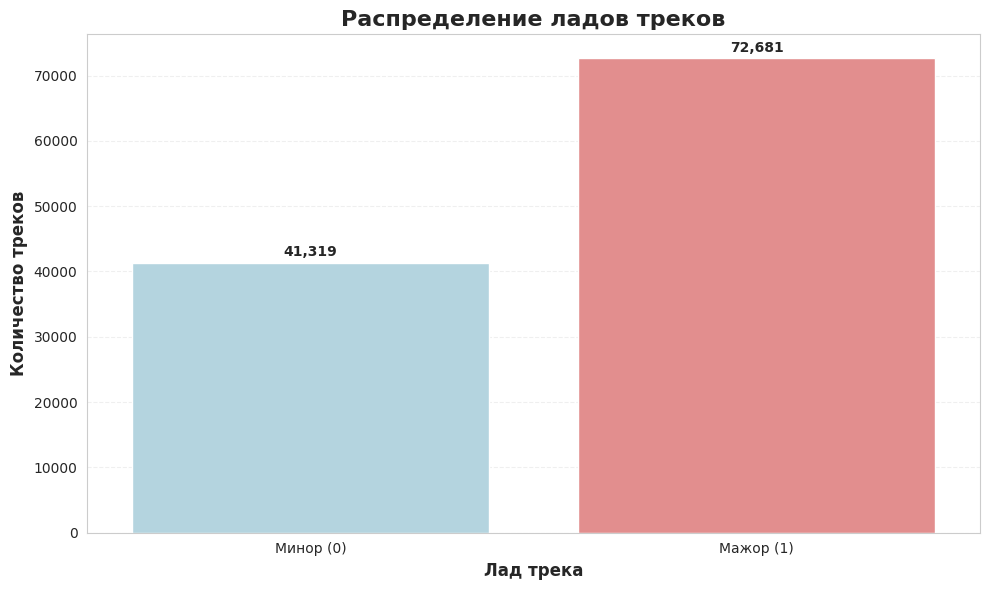

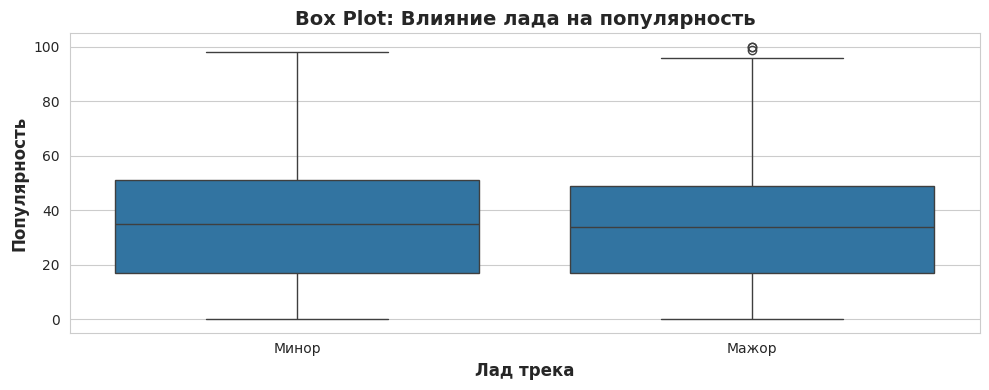

In [160]:
# Визуализация распределения ладов треков
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

sns.countplot(data=df, x='mode', palette=['lightblue', 'lightcoral'])

plt.xticks([0, 1], ['Минор (0)', 'Мажор (1)'])
plt.xlabel('Лад трека', fontsize=12, fontweight='bold')
plt.ylabel('Количество треков', fontsize=12, fontweight='bold')
plt.title('Распределение ладов треков', fontsize=16, fontweight='bold')

counts = df['mode'].value_counts().sort_index()
plt.text(0, counts[0] + 1000, f'{counts[0]:,}', ha='center', fontweight='bold')
plt.text(1, counts[1] + 1000, f'{counts[1]:,}', ha='center', fontweight='bold')

plt.grid(True, alpha=0.3, linestyle='--', axis='y')
plt.tight_layout()
plt.show()

print("\n\n")

# Boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x='mode', y='popularity')
plt.xticks([0, 1], ['Минор', 'Мажор'])
plt.xlabel('Лад трека', fontsize=12, fontweight='bold')
plt.ylabel('Популярность', fontsize=12, fontweight='bold')
plt.title('Box Plot: Влияние лада на популярность', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

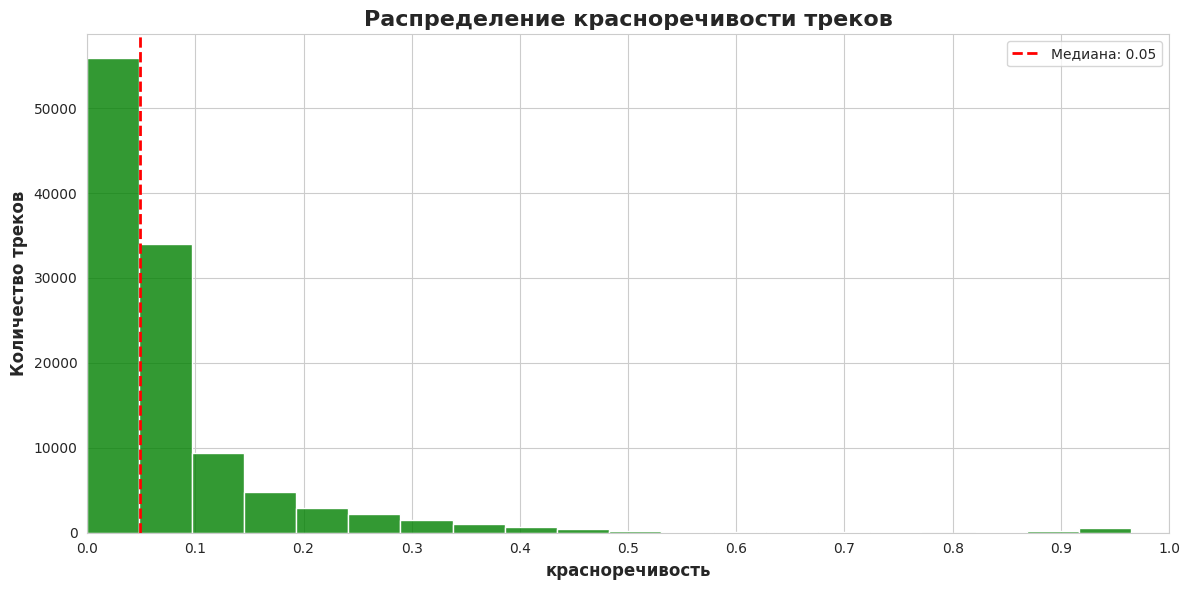

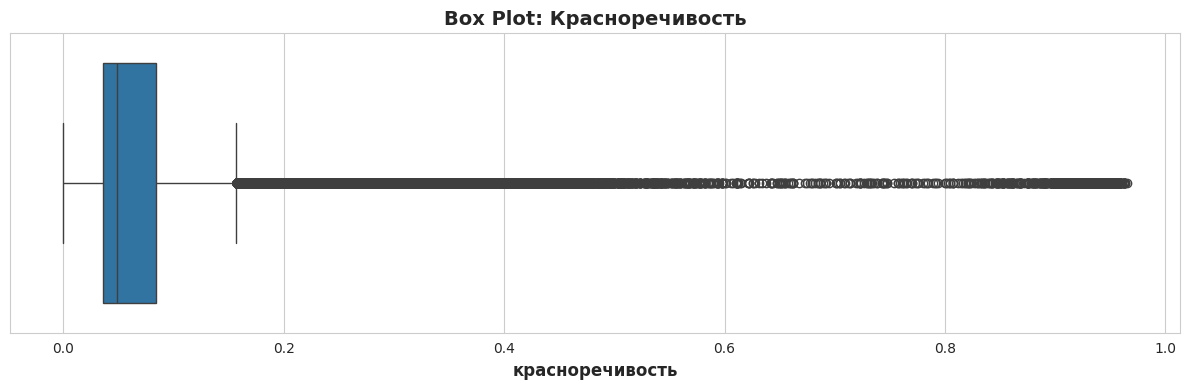

In [161]:
# Визуализация распределения красноречивости треков
plt.figure(figsize=(12, 6))

sns.histplot(data=df, x='speechiness', bins=20, alpha=0.8, color='green')

median_speech = df['speechiness'].median()
plt.axvline(median_speech, color='red', linestyle='--', linewidth=2,
           label=f'Медиана: {median_speech:.2f}')

plt.xlabel('красноречивость', fontsize=12, fontweight='bold')
plt.ylabel('Количество треков', fontsize=12, fontweight='bold')
plt.title('Распределение красноречивости треков', fontsize=16, fontweight='bold')
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.xlim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

print("\n\n")

# Boxplot
plt.figure(figsize=(12, 4))
sns.boxplot(data=df, x='speechiness')
plt.xlabel('красноречивость', fontsize=12, fontweight='bold')
plt.title('Box Plot: Красноречивость', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

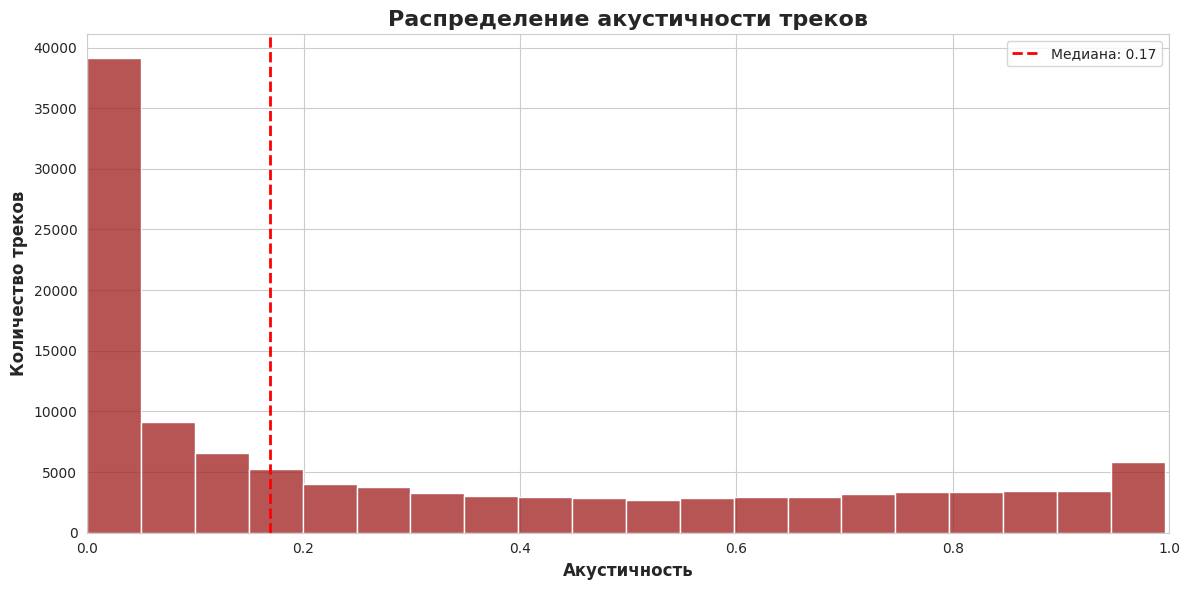

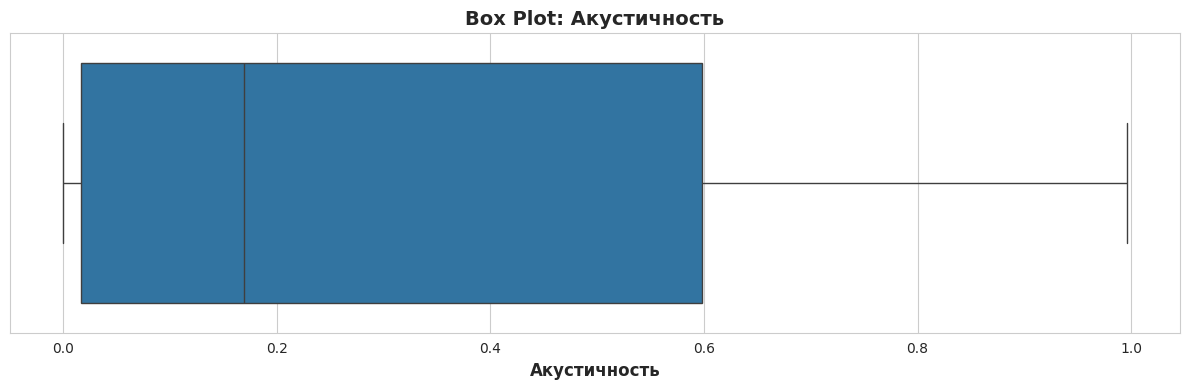

In [162]:
# Визуализация распределения акустичности треков
plt.figure(figsize=(12, 6))

sns.histplot(data=df, x='acousticness', bins=20, alpha=0.8, color='brown')

median_acoustic = df['acousticness'].median()
plt.axvline(median_acoustic, color='red', linestyle='--', linewidth=2,
           label=f'Медиана: {median_acoustic:.2f}')

plt.xlabel('Акустичность', fontsize=12, fontweight='bold')
plt.ylabel('Количество треков', fontsize=12, fontweight='bold')
plt.title('Распределение акустичности треков', fontsize=16, fontweight='bold')
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.xlim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

print("\n\n")

# Boxplot
plt.figure(figsize=(12, 4))
sns.boxplot(data=df, x='acousticness')
plt.xlabel('Акустичность', fontsize=12, fontweight='bold')
plt.title('Box Plot: Акустичность', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

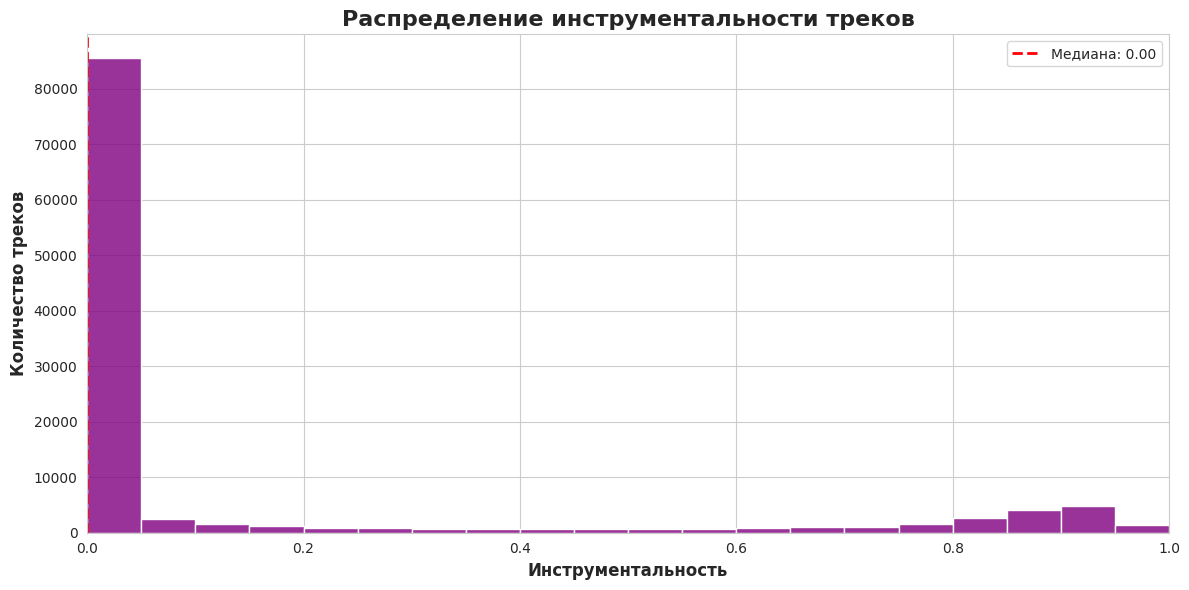

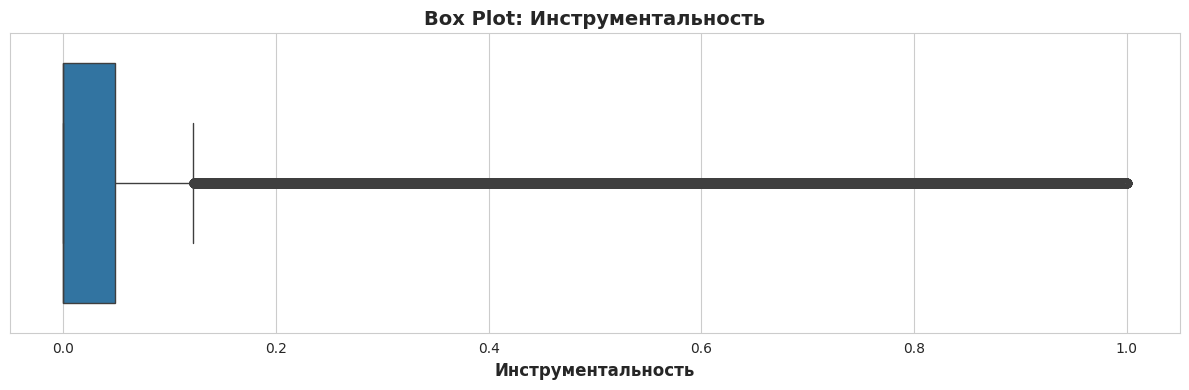

In [163]:
# Визуализация распределения инструментальности треков
plt.figure(figsize=(12, 6))

sns.histplot(data=df, x='instrumentalness', bins=20, alpha=0.8, color='purple')

median_instrumental = df['instrumentalness'].median()
plt.axvline(median_instrumental, color='red', linestyle='--', linewidth=2,
           label=f'Медиана: {median_instrumental:.2f}')

plt.xlabel('Инструментальность', fontsize=12, fontweight='bold')
plt.ylabel('Количество треков', fontsize=12, fontweight='bold')
plt.title('Распределение инструментальности треков', fontsize=16, fontweight='bold')
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.xlim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

print("\n\n")

plt.figure(figsize=(12, 4))
sns.boxplot(data=df, x='instrumentalness')
plt.xlabel('Инструментальность', fontsize=12, fontweight='bold')
plt.title('Box Plot: Инструментальность', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n\n")

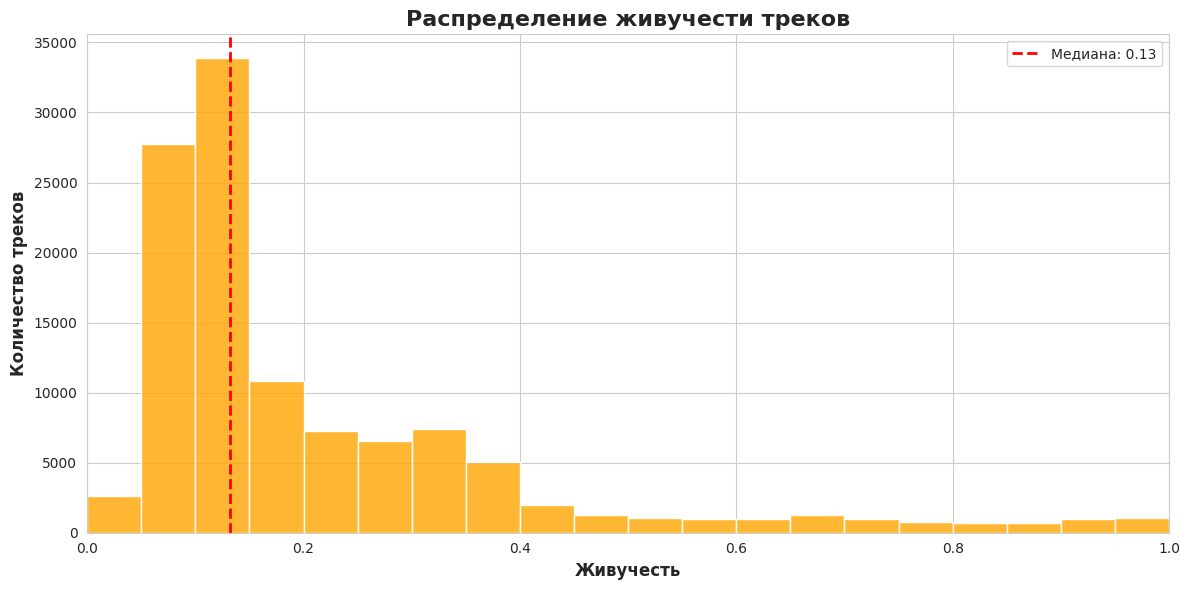

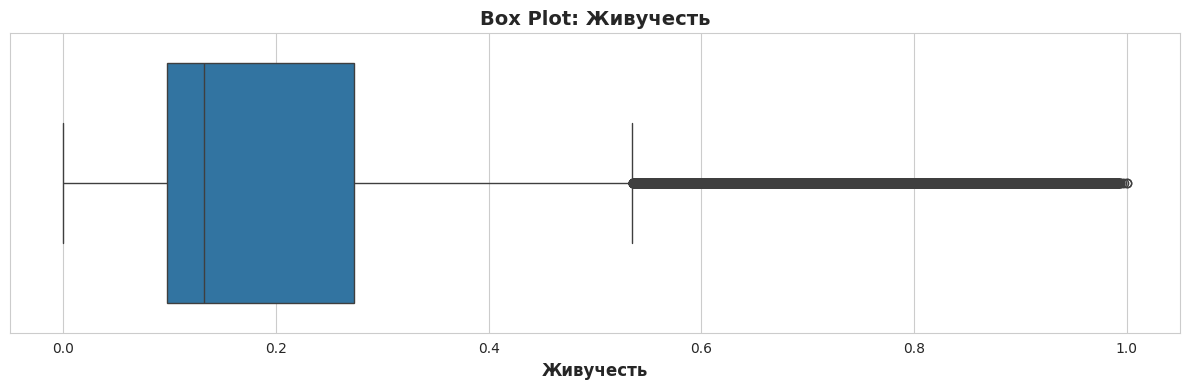

In [164]:
# Визуализация распределения живучести треков
plt.figure(figsize=(12, 6))

sns.histplot(data=df, x='liveness', bins=20, alpha=0.8, color='orange')

median_liveness = df['liveness'].median()
plt.axvline(median_liveness, color='red', linestyle='--', linewidth=2,
           label=f'Медиана: {median_liveness:.2f}')

plt.xlabel('Живучесть', fontsize=12, fontweight='bold')
plt.ylabel('Количество треков', fontsize=12, fontweight='bold')
plt.title('Распределение живучести треков', fontsize=16, fontweight='bold')
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.xlim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

print("\n\n")

plt.figure(figsize=(12, 4))
sns.boxplot(data=df, x='liveness')
plt.xlabel('Живучесть', fontsize=12, fontweight='bold')
plt.title('Box Plot: Живучесть', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n\n")

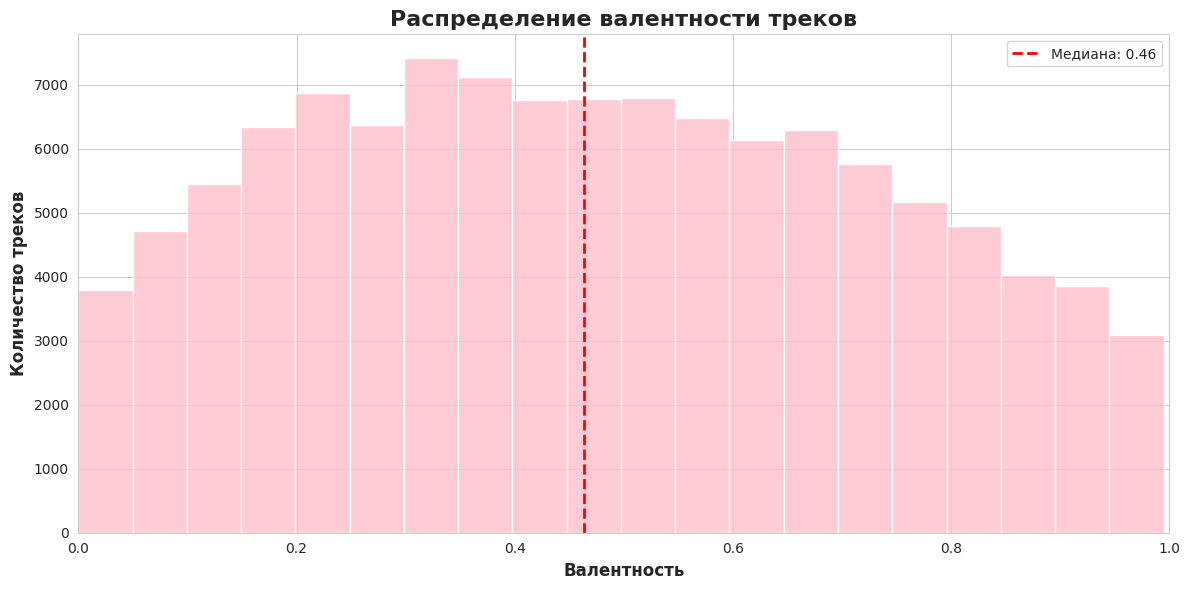

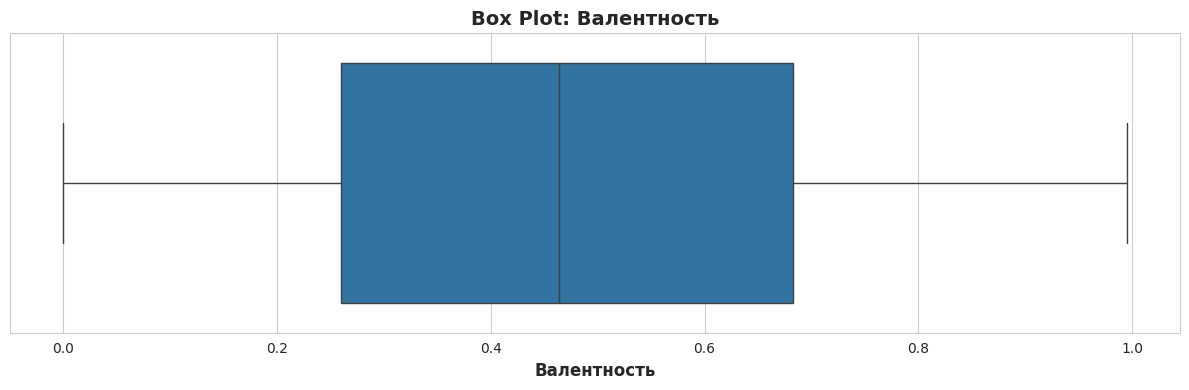

In [165]:
# Визуализация распределения валентности треков
plt.figure(figsize=(12, 6))

sns.histplot(data=df, x='valence', bins=20, alpha=0.8, color='pink')

median_valence = df['valence'].median()
plt.axvline(median_valence, color='red', linestyle='--', linewidth=2,
           label=f'Медиана: {median_valence:.2f}')

plt.xlabel('Валентность', fontsize=12, fontweight='bold')
plt.ylabel('Количество треков', fontsize=12, fontweight='bold')
plt.title('Распределение валентности треков', fontsize=16, fontweight='bold')
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.xlim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

print("\n\n")

plt.figure(figsize=(12, 4))
sns.boxplot(data=df, x='valence')
plt.xlabel('Валентность', fontsize=12, fontweight='bold')
plt.title('Box Plot: Валентность', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n\n")

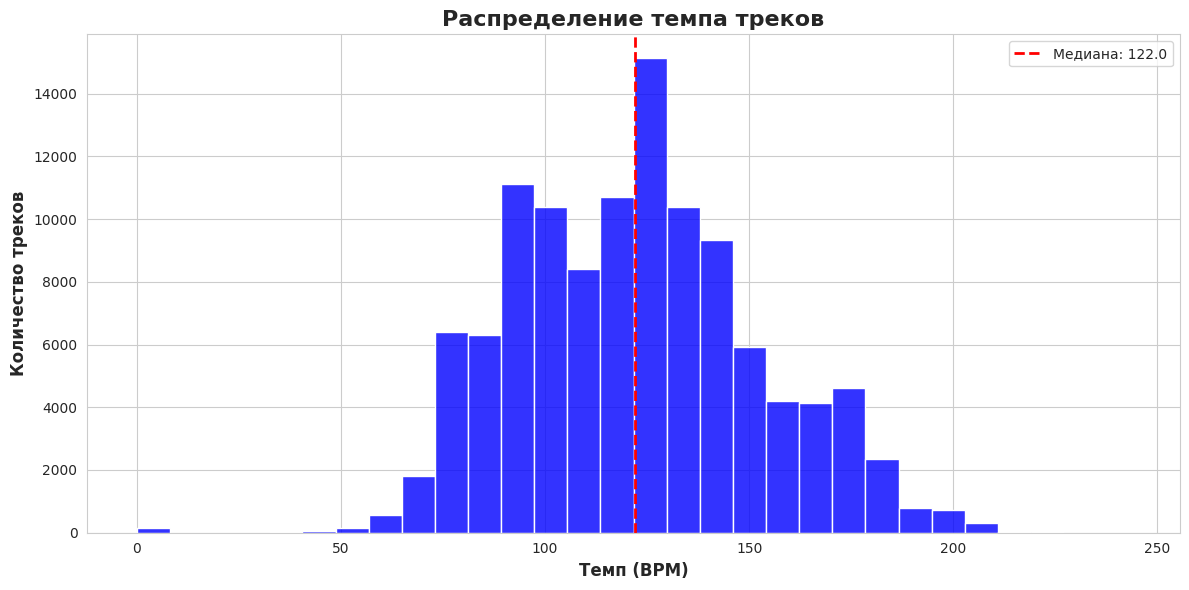

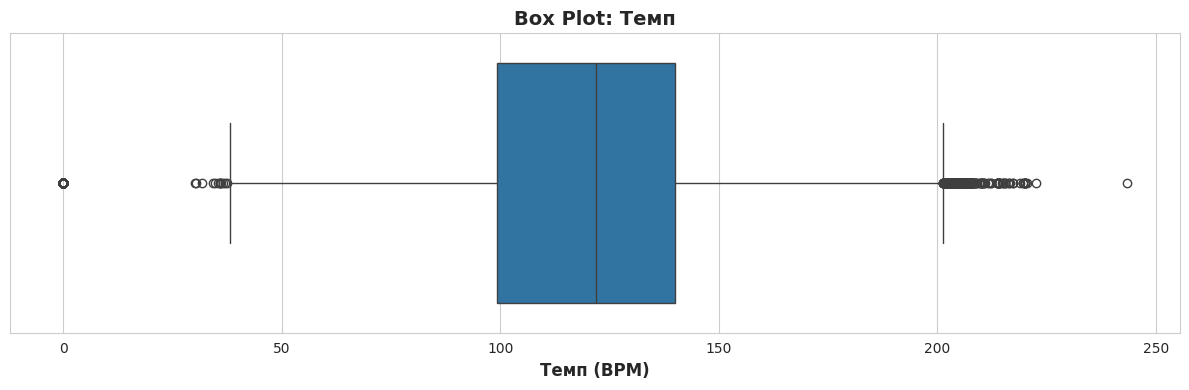

In [166]:
# Визуализация распределения темпа треков
plt.figure(figsize=(12, 6))

sns.histplot(data=df, x='tempo', bins=30, alpha=0.8, color='blue')

median_tempo = df['tempo'].median()
plt.axvline(median_tempo, color='red', linestyle='--', linewidth=2,
           label=f'Медиана: {median_tempo:.1f}')

plt.xlabel('Темп (BPM)', fontsize=12, fontweight='bold')
plt.ylabel('Количество треков', fontsize=12, fontweight='bold')
plt.title('Распределение темпа треков', fontsize=16, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

print("\n\n")

plt.figure(figsize=(12, 4))
sns.boxplot(data=df, x='tempo')
plt.xlabel('Темп (BPM)', fontsize=12, fontweight='bold')
plt.title('Box Plot: Темп', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n\n")

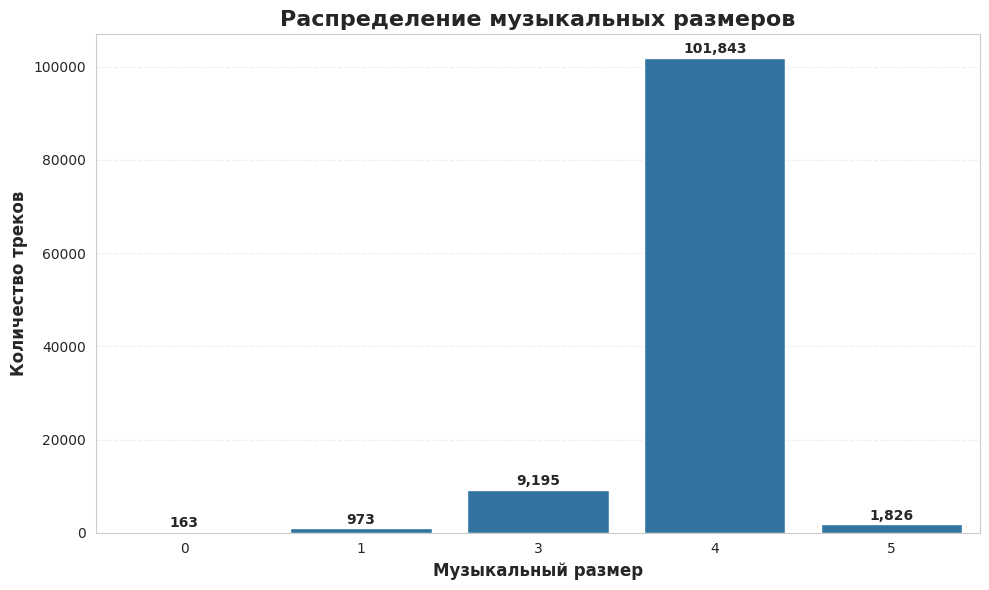

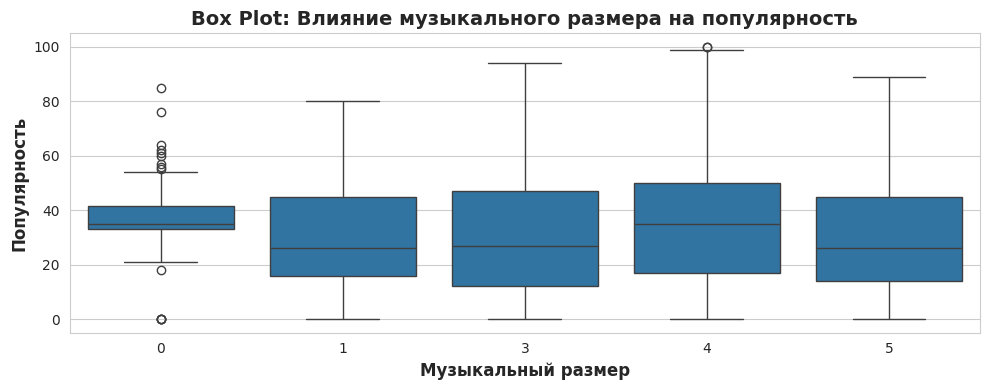

In [167]:
# Визуализация распределения музыкальных размеров
plt.figure(figsize=(10, 6))

sns.countplot(data=df, x='time_signature')

counts = df['time_signature'].value_counts().sort_index()
for i, count in enumerate(counts):
    plt.text(i, count + 1000, f'{count:,}', ha='center', fontweight='bold')

plt.xlabel('Музыкальный размер', fontsize=12, fontweight='bold')
plt.ylabel('Количество треков', fontsize=12, fontweight='bold')
plt.title('Распределение музыкальных размеров', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--', axis='y')
plt.tight_layout()
plt.show()

print("\n\n")

plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x='time_signature', y='popularity')
plt.xlabel('Музыкальный размер', fontsize=12, fontweight='bold')
plt.ylabel('Популярность', fontsize=12, fontweight='bold')
plt.title('Box Plot: Влияние музыкального размера на популярность', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

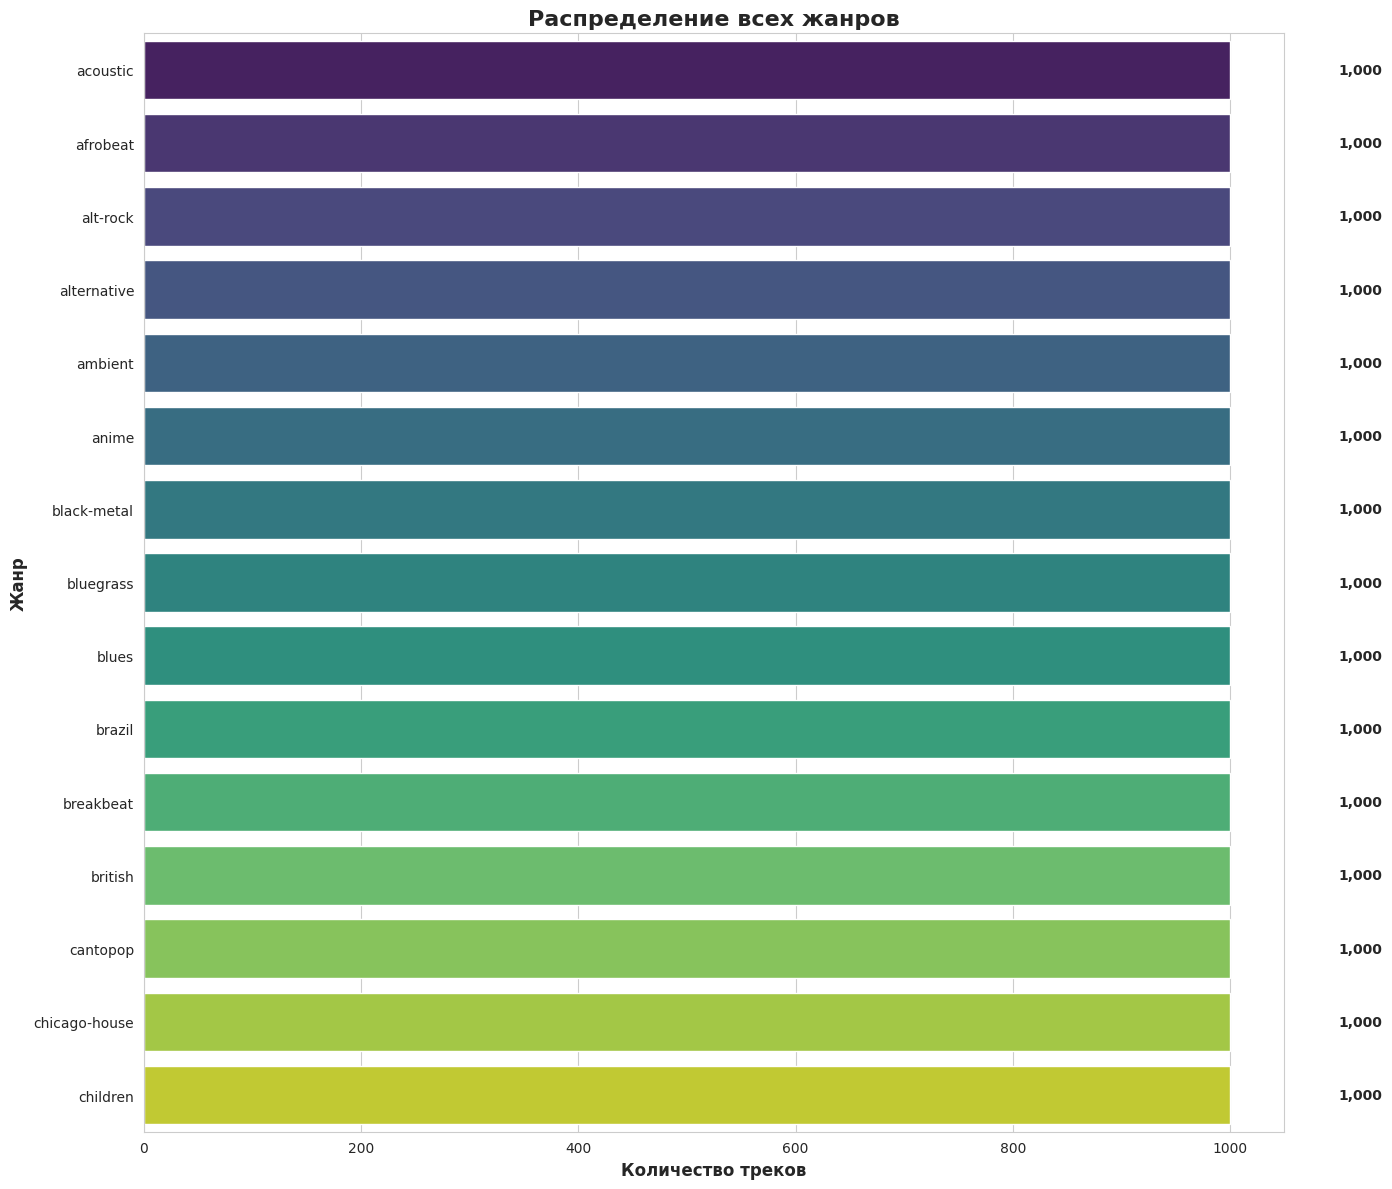

In [176]:
# Визуализация распределения жанров треков
plt.figure(figsize=(14, 12))  # Увеличиваем высоту

# Берем жанры
top_genres = df['track_genre'].value_counts().head(15)

sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')

# Добавляем числа на каждый столбец
for i, count in enumerate(top_genres.values):
    plt.text(count + 100, i, f'{count:,}', va='center', fontweight='bold')

plt.xlabel('Количество треков', fontsize=12, fontweight='bold')
plt.ylabel('Жанр', fontsize=12, fontweight='bold')
plt.title('Распределение всех жанров', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

In [175]:
# Описательная статистика для числовых признаков
numeric_features = ['popularity', 'duration_ms', 'danceability', 'energy',
                   'loudness', 'speechiness', 'acousticness', 'instrumentalness',
                   'liveness', 'valence', 'tempo']

print("Описательная статистика:")
print("=" * 60)

for feature in numeric_features:
    print(f"\n📊 {feature.upper()}:")
    stats = df[feature].describe()
    print(f"   Count: {stats['count']:,.0f}")
    print(f"   Mean: {stats['mean']:.3f}")
    print(f"   Std: {stats['std']:.3f}")
    print(f"   Min: {stats['min']:.3f}")
    print(f"   25%: {stats['25%']:.3f}")
    print(f"   50%: {stats['50%']:.3f}")
    print(f"   75%: {stats['75%']:.3f}")
    print(f"   Max: {stats['max']:.3f}")
    print("-" * 40)

# Статистика для жанров
print("Статистика по жанрам:")
print(f"Всего уникальных жанров: {df['track_genre'].nunique()}")
print(f"Треков в каждом жанре: {df['track_genre'].value_counts().iloc[0]:,}")
print(f"Общее количество треков: {len(df):,}")

Описательная статистика:

📊 POPULARITY:
   Count: 114,000
   Mean: 33.239
   Std: 22.305
   Min: 0.000
   25%: 17.000
   50%: 35.000
   75%: 50.000
   Max: 100.000
----------------------------------------

📊 DURATION_MS:
   Count: 114,000
   Mean: 228029.153
   Std: 107297.713
   Min: 0.000
   25%: 174066.000
   50%: 212906.000
   75%: 261506.000
   Max: 5237295.000
----------------------------------------

📊 DANCEABILITY:
   Count: 114,000
   Mean: 0.567
   Std: 0.174
   Min: 0.000
   25%: 0.456
   50%: 0.580
   75%: 0.695
   Max: 0.985
----------------------------------------

📊 ENERGY:
   Count: 114,000
   Mean: 0.641
   Std: 0.252
   Min: 0.000
   25%: 0.472
   50%: 0.685
   75%: 0.854
   Max: 1.000
----------------------------------------

📊 LOUDNESS:
   Count: 114,000
   Mean: -8.259
   Std: 5.029
   Min: -49.531
   25%: -10.013
   50%: -7.004
   75%: -5.003
   Max: 4.532
----------------------------------------

📊 SPEECHINESS:
   Count: 114,000
   Mean: 0.085
   Std: 0.106
   Mi

### Выводы по Задаче 2:




## Сильные аномалии

- **`duration_ms`** - много выбросов справа (сверхдлинные треки >5 мин) и слева (<1 мин)
- **`instrumentalness`** - много выбросов справа (чисто инструментальные треки)  
- **`speechiness`** - много выбросов справа (речевые треки, подкасты)
- **`loudness`** - много выбросов слева (очень тихие треки)
- **`danceability`** - много выбросов слева (нетанцевальные треки)

## Умеренные аномалии

- **`tempo`** - выбросы слева и справа (очень медленные/быстрые треки)
- **`liveness`** - выбросы справа (треки с живой аудиторией)
- **`popularity`** - несколько выбросов сверху (супер-популярные треки)

## Аномалий почти нет

- **`energy`** - сбалансированное распределение
- **`valence`** - умеренное распределение  
- **`acousticness`** - равномерное распределение
- **`key`/`mode`** - категориальные, выбросов нет
- **`time_signature`** - стабильное распределение

## Главные идеи

1. **Датасет хорошо сбалансирован** по жанрам (ровно 1000 треков на жанр)
2. **Большинство признаков** имеют реалистичные распределения для музыкальных данных
3. **Выбросы в основном объяснимы** - представляют нишевые музыкальные стили
4. **Для ML моделей** может потребоваться обработка выбросов в `duration_ms`, `instrumentalness`, `speechiness`


# ЗАДАЧА 3: Анализ категориальных признаков

## Цель
Выявление наиболее популярных категорий артистов и жанров, анализ их влияния на популярность треков.

## План действий

### 1. Частотный анализ артистов и жанров
- Проанализировать распределение треков по артистам
- Проанализировать распределение треков по жанрам  
- Выявить самых продуктивных артистов

### 2. Визуализация топ-N категорий
- Построить барплоты для топ артистов по количеству треков
- Визуализировать топ жанров по количеству треков
- Создать графики средней популярности по категориям

### 3. Анализ влияния категорий на популярность
- Исследовать зависимость популярности от артиста
- Исследовать зависимость популярности от жанра
- Выявить наиболее популярные категории

## Ожидаемые результаты
- Выявление топ-15 самых частых артистов
- Определение самых популярных жанров  
- Анализ влияния артиста и жанра на популярность трека
- Рекомендации по feature engineering для категориальных признаков